In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

## Load and inspect columns

1. age (years) 
2. sex (1 = male; 0 = female)
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl (0, 1)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina (0, 1)  
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment: (0, 1, 2) 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (0, 1, 2)


Categorical columns: `sex (2)`, `cp (3)`, `fbs (6)`, `restecg (7)`, `exang (9)`, `slope (11)`, `ca (12) (?)`, `thal (13)`

### References: 
- https://www.kaggle.com/datafan07/heart-disease-and-some-scikit-learn-magic

In [5]:
data_dir = Path('../data/')
heart_csv = data_dir / 'heart.csv'

In [7]:
heart_df = pd.read_csv(heart_csv)
nrows, ncols = heart_df.shape

print('Dataset has {} rows and {} columns'.format(nrows, ncols))

heart_df.sample(5)

Dataset has 303 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [8]:
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous = list(set(heart_df.columns.tolist()).difference(set(categorical + ['target'])))

print(continuous)

['oldpeak', 'trestbps', 'age', 'thalach', 'chol']


In [10]:
for cat in categorical:
    print(f'Column {cat}')
    values = heart_df[cat].unique()
    print(values.tolist())

Column sex
[1, 0]
Column cp
[3, 2, 1, 0]
Column fbs
[1, 0]
Column restecg
[0, 1, 2]
Column exang
[0, 1]
Column slope
[0, 2, 1]
Column ca
[0, 2, 1, 3, 4]
Column thal
[1, 2, 3, 0]


In [12]:
for num in continuous:
    print(f'Column {num}')
    values = heart_df[num]
    print(values.describe())
    print('---')

Column oldpeak
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64
---
Column trestbps
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
---
Column age
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
---
Column thalach
count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64
---
Column chol
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.00000

## Load and inspect columns

1. age (years) 
2. sex (1 = male; 0 = female)
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl (0, 1)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina (0, 1)  
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment: (0, 1, 2) 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (0, 1, 2)


Categorical columns: `sex (2)`, `cp (3)`, `fbs (6)`, `restecg (7)`, `exang (9)`, `slope (11)`, `ca (12) (?)`, `thal (13)`

### References: 
- https://www.kaggle.com/datafan07/heart-disease-and-some-scikit-learn-magic

In [ ]:
data_dir = Path('../data/raw/')
heart_csv = data_dir / 'heart.csv'

In [ ]:
heart_df = pd.read_csv(heart_csv)
nrows, ncols = heart_df.shape

print('Dataset has {} rows and {} columns'.format(nrows, ncols))

heart_df.sample(5)

In [ ]:
heart_df.nunique()

In [ ]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous = list(set(heart_df.columns.tolist()).difference(set(categorical + ['target'])))

print(continuous)

In [ ]:
print('Categorical features (normalized)')
weights = np.ones((len(heart_df), 1)) / len(heart_df)
heart_df[categorical + ['target']].hist(figsize=(9, 9), weights=weights)
print()

In [ ]:
print('Distribution plots of continuous columns')

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs = [ax for row in axs for ax in row] # flatten

for ax, column in zip(axs, continuous):
    sns.distplot(heart_df[column], bins=25, ax=ax)


# heart_df[continuous].hist(figsize=(9, 9), weights=weights)
# print()

In [ ]:
plt.figure(figsize=(16, 10))
sns.pairplot(heart_df[continuous + ['target']], 
             hue='target',
             markers=['o','D'], 
             plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

In [ ]:
sns.set(font_scale=1.1)
correlations = heart_df.corr()
mask = np.triu(correlations.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlations,
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

In [ ]:
top_correlations = correlations['target'].abs().iloc[:-1].to_frame()
top_correlations.columns = ['abs_corr']
top_correlations = top_correlations.sort_values('abs_corr', ascending=False)

In [ ]:
top_correlations

## Load and inspect columns

1. age (years) 
2. sex (1 = male; 0 = female)
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl (0, 1)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina (0, 1)  
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment: (0, 1, 2) 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (0, 1, 2)


Categorical columns: `sex (2)`, `cp (3)`, `fbs (6)`, `restecg (7)`, `exang (9)`, `slope (11)`, `ca (12) (?)`, `thal (13)`

### References: 
- https://www.kaggle.com/datafan07/heart-disease-and-some-scikit-learn-magic

In [4]:
data_dir = Path('../data/raw/')
heart_csv = data_dir / 'heart.csv'

In [18]:
heart_df = pd.read_csv(heart_csv)
nrows, ncols = heart_df.shape

print('Dataset has {} rows and {} columns'.format(nrows, ncols))

heart_df.sample(5)

Dataset has 303 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1


In [19]:
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [55]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous = list(set(heart_df.columns.tolist()).difference(set(categorical + ['target'])))

print(continuous)

['oldpeak', 'chol', 'thalach', 'age', 'trestbps']


Categorical features (normalized)



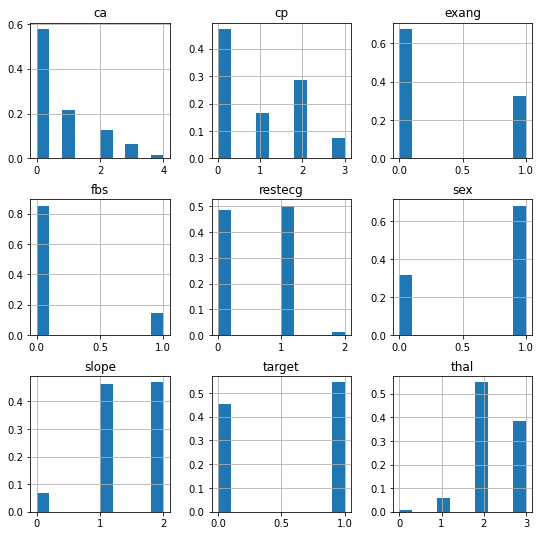

In [56]:
print('Categorical features (normalized)')
weights = np.ones((len(heart_df), 1)) / len(heart_df)
heart_df[categorical + ['target']].hist(figsize=(9, 9), weights=weights)
print()

Distribution plots of continuous columns


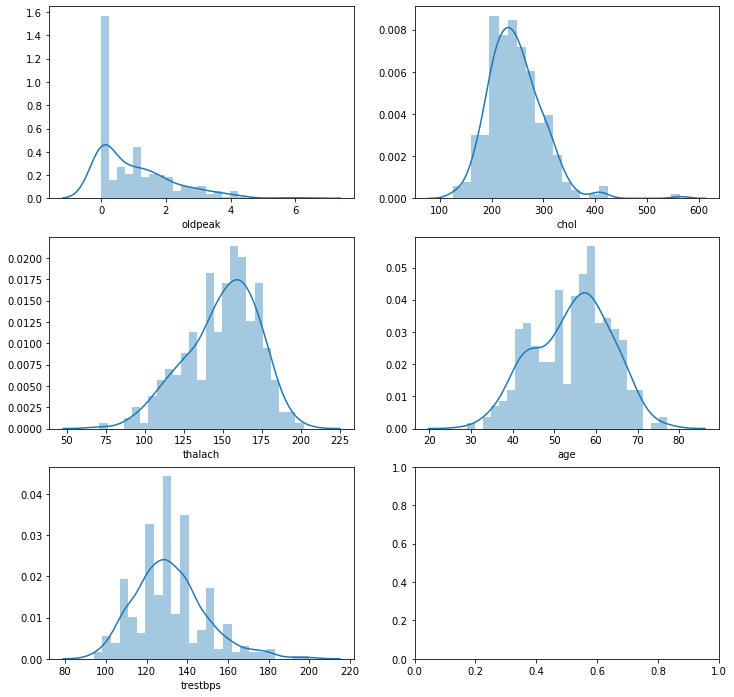

In [66]:
print('Distribution plots of continuous columns')

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs = [ax for row in axs for ax in row] # flatten

for ax, column in zip(axs, continuous):
    sns.distplot(heart_df[column], bins=25, ax=ax)


# heart_df[continuous].hist(figsize=(9, 9), weights=weights)
# print()

<Figure size 1152x720 with 0 Axes>

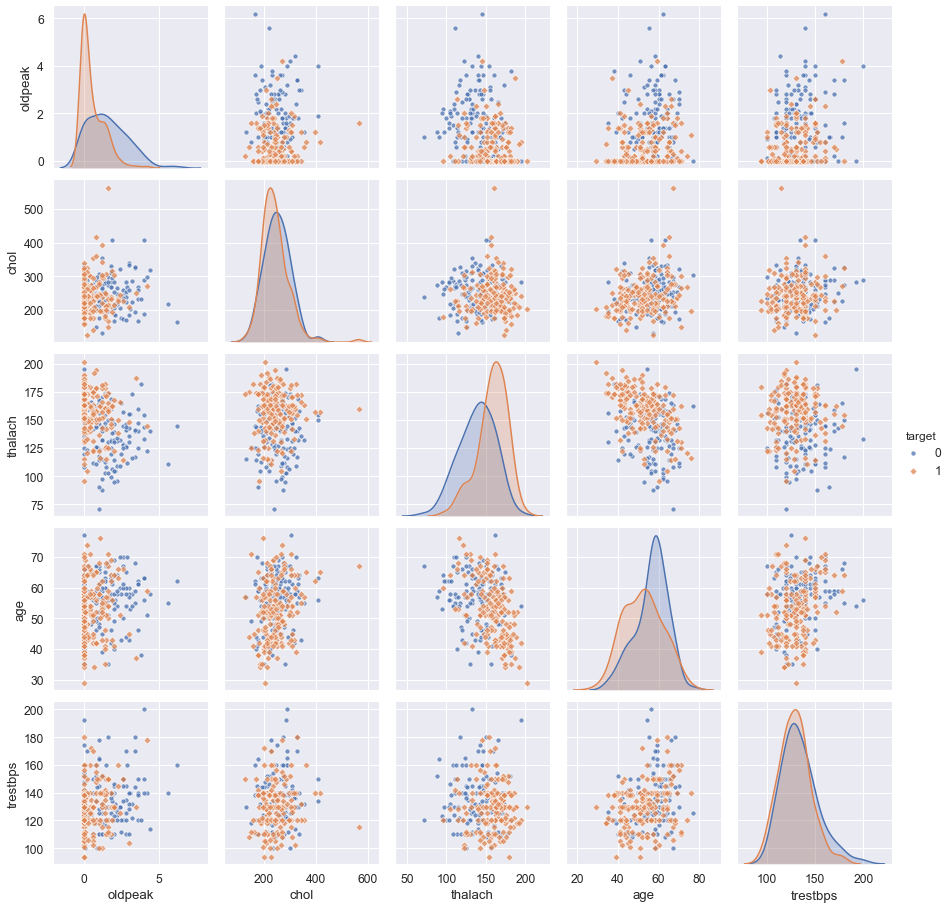

In [68]:
plt.figure(figsize=(16, 10))
sns.pairplot(heart_df[continuous + ['target']], 
             hue='target',
             markers=['o','D'], 
             plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

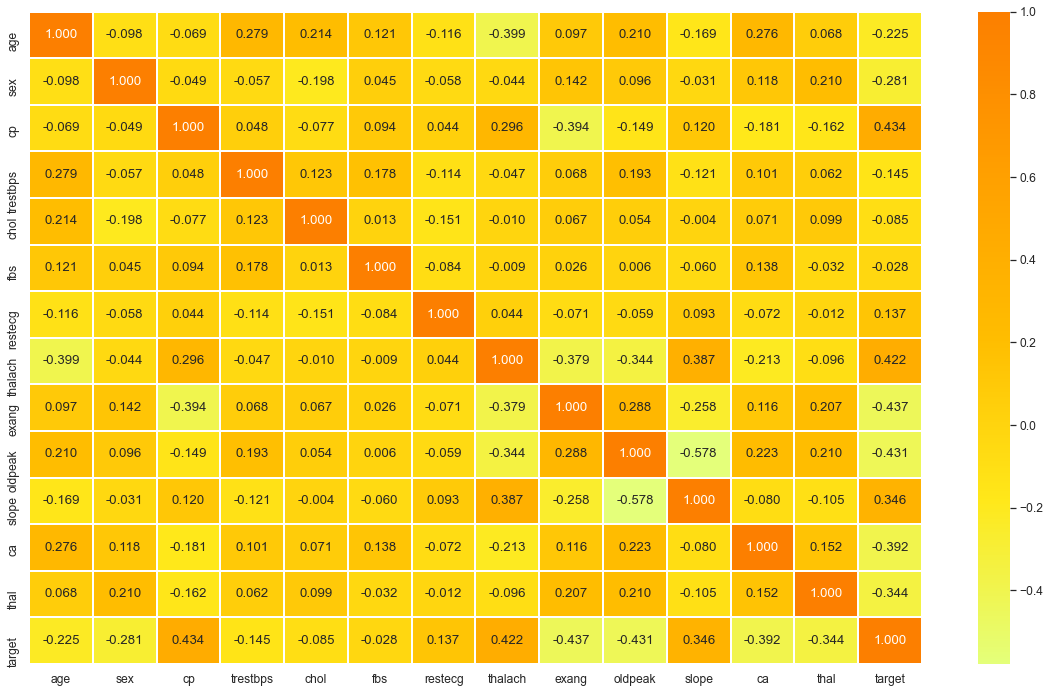

In [67]:
sns.set(font_scale=1.1)
correlations = heart_df.corr()
mask = np.triu(correlations.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlations,
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

In [80]:
top_correlations = correlations['target'].abs().iloc[:-1].to_frame()
top_correlations.columns = ['abs_corr']
top_correlations = top_correlations.sort_values('abs_corr', ascending=False)

In [81]:
top_correlations

,abs_corr
exang,0.436757
cp,0.433798
oldpeak,0.430696
thalach,0.421741
ca,0.391724
slope,0.345877
thal,0.344029
sex,0.280937
age,0.225439
trestbps,0.144931
